# SLU03 | Visualization with Pandas and Matplotlib: Learning notebook

In this notebook, we will cover the following: 

- Scatter plots
- Line charts
- Bar/Column charts
- Histograms
- Box plots
- Chartjunk
- Matplotlib basics
- How to choose the right chart

## 1. Some theory first!

Data Visualization techniques serve 3 main purposes:
- **Purpose 1** - Communicate an idea
- **Purpose 2** - Data Understanding
- **Purpose 3** - Monitorization

Let's check them...

### 1.1 Purpose 1 - Communicate an idea

Data Visualization (or *DataViz*) techniques can be used very effectively to communicate an idea to an external party.

Here is an example:

<img src="./data/map.jpeg" width="900"/>

**This map is one of the oldest dataviz examples that exist.**

In 1854, London was being ravaged by a deadly cholera outbreak. At that time, doctors believed that cholera was transmitted by the air, via what they called **“bad humours”**, that is, bad air floating around. **Doctor John Snow** had a different idea, as he believed *water was the main way of spreading the disease*.

So he went to the area with the most cholera cases detected, and did a **survey**, counting how many people had been infected in each neighbourhood block. And then he **displayed it on a map**. `Each tiny black rectangle represents an infected person`. 

At that point **it became obvious that the biggest cluster of disease emanated from a well on Broad Street** (you can see it labelled **`pump`** right at the epicenter of the infected cases). After using this map to convince both his colleagues and the local authorities, John Snow managed to close the infected well, and soon after the cholera outbreak stopped.

[Here](https://www.rcseng.ac.uk/library-and-publications/library/blog/mapping-disease-john-snow-and-cholera/) is an in-depth article about **John Snow's map**.

### 1.2 Purpose 2 - Data Understanding

For any scientist, or analyst, data visualization really helps **to gain a better understanding and discover patterns in the data** we are analyzing.

A classic example of this is the **`Anscombe Quartet`**:

<img src="./data/anscombe.jpeg" width="700"/>

This is a dataset, created by **Francis Anscombe**, that consists of **4 different series of x and y** (shown on the top left of the image above). If a statistician were to analyze this dataset just by looking at the summary statistics (shown on the top right of the image above), they would see that for each one of these series, the statistics are the same. Same mean of x, mean of y, variance, etc. So they could arrive at the conclusion that *it was the same series of x and y repeated 4 times!*

Well, if instead of just looking at summary statistics they had *plotted each series independently* (shown on the bottom of the image above), they would have realized that each of the 4 series is **completely different**, just happens to have the same statistics.

### 1.3 Purpose 3 - Monitorization

Another use of data visualization is to **help monitor processes or performance** of a company. This monitorization is usually performed via a **`dashboard`**.

A dashboard is basically **a visual interface where key metrics are displayed**. This way the person or department who owns such dashboard can check very easily the current status of whatever they are in charge of.

Look at this example:

<img src="./data/dashboard.png" width="800"/>

The image on the left shows a *`report`* consisting of tens of columns and rows that was sent to a company's CFO, the image on the right is a dashboard representing the same data. We can see that by representing the data visually, *we are doing the job of processing the data, so the person in charge (the CFO) can focus on their expertise, that is finding insights and making decisions*. 

We are now going to proceed to learn the basics of visualization with python, but before we start, a word of caution about one of the pitfalls of data visualization: **`Chartjunk`**.

What is **`chartjunk`**? Well, it is easily described with an example:

<img src="./data/chartjunk1.jpg" width="700"/>

Not clear? How about this one:

<img src="./data/chartjunk2.png" width="700"/>

[Chartjunk](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=00040Z) consist of **any visual information that doesn't help the visualization, but makes it harder to understand.** Since Data visualization is a very creative part of Data Science, we are sometimes tempted to make compelling, innovative visualizations. This is great, but *we always need to be aware of the elements that we are adding to our visualization*. Are they absolutely necessary?

**As a `rule of thumb`, if you have to explain your visualization, it's probably too complex.**

## 2. Now, let's go practice!

We start by importing **`pandas`** and **`matplotlib`**. We can use both libraries to make plots. [Matplotlib](https://matplotlib.org/) is a very versatile plotting library with a very good documentation. Pandas has a more limited choice of plots and it's plotting capabilities are in fact based on matplotlib. Pandas plotting library is just a thin wrapper around matplotlib. Matplotlib has a somewhat convoluted api, and pandas makes plotting common charts much easier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**`Matplotlib`** is a library initially designed to save charts to files. We usually use the submodule `pyplot` to plot things or customize plots. The convention is **importing it as `plt`**, *same way as we shorten pandas as pd* (saves a few keystrokes!).

`pyplot` will display the plots inside the notebook. In previous versions of Jupyter, it was necessary to use the ✨[magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)✨ `%matplotlib inline` to achieve this. You might still spot this in older Jupyter versions.

The dataset we are going to use is a variation of the Online Retail Dataset ([source](http://archive.ics.uci.edu/ml/datasets/online+retail))

This is a transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [2]:
data = pd.read_csv("data/online_orders.csv")

In [3]:
data.head()

,country,date,sales,n_items,n_orders,day_of_week
0,Australia,2010-12-01,358.25,107,1,2
1,Australia,2010-12-08,258.90,214,1,2
2,Australia,2010-12-17,415.70,146,1,4
3,Australia,2011-01-06,7154.38,4802,2,3
4,Australia,2011-01-10,81.60,96,1,0


The dataset consists of the following fields:

- **`country`**: Country name
- **`date`**: Date when the transactions occured
- **`sales`**: Total sales revenue (in UK pounds) for that country and date
- **`n_items`**: Number of items sold
- **`n_orders`**: Number of different online orders
- **`day_of_week`**: Day of week

We're going to plot the dataset in different ways and explore the usefulness of each plot type.

### 2.1 Scatter plots

We can use a scatter plot **`to see the relationship between variables`**, for example, the number of items sold and the total sales revenue. We will use pandas to plot it.

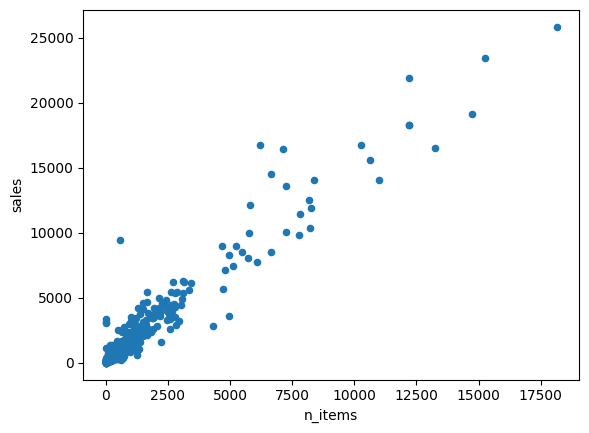

In [4]:
data.plot.scatter(x='n_items', y='sales');

We have made our very first chart, yaaaay!! 🎉🎉🎉

<div class="alert alert-info">
    ⚠️ <b>NOTE: </b>Did you see that we add a semicolon <code>;</code> at the end of the cell?<br/><br/>
    That is because <b>jupyter notebooks</b> by default return the last value of a cell, so if we run the cell without a semicolon the notebook will display the <b>plot object</b>. <i>(some random thing like <code>&lt; AxesSubplot:... &gt;</code>)</i>
</div>

<Axes: xlabel='n_items', ylabel='sales'>

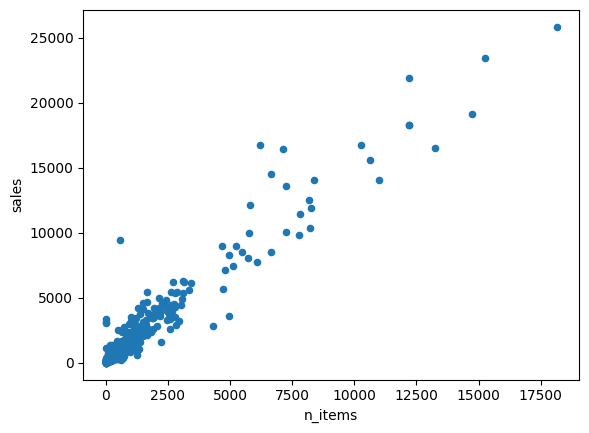

In [5]:
data.plot.scatter(x='n_items', y='sales')

Depending on your browser and your screen resolution, you might think that the previous chart is too small or too large. We can fix this by changing the matplotlib options for chart size.

We can set the chart size globally by changing the matplotlib default settings. These are included in the dictionary `plt.rcParams`.

The **plot size** is defined as a list with 2 elements, `[width, height]` in **inches**. The default chart size is 6.4 inches wide by 4.8 inches tall.

For me, the chart is slightly too large to fit onto my laptop screen, so I will set it to 5.6 x 4.2 inches. You can change the size to suit your needs.

In [6]:
plt.rcParams["figure.figsize"] = [5.6, 4.2]

Now if we plot the same chart again, we see it's smaller:

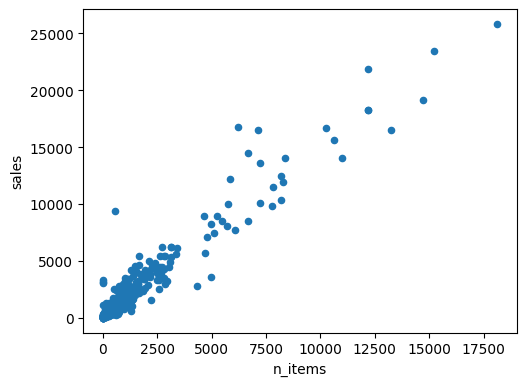

In [7]:
data.plot.scatter(x='n_items', y='sales');

No surprises here, we see that there is a linear relationship between the number of items purchased and the sales revenue.

We can now see how do sales relate to the day of week:

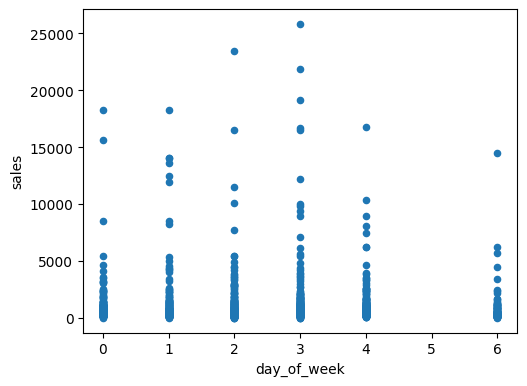

In [8]:
data.plot.scatter(x='day_of_week', y="sales");

We can see that sales are generally equaly distributed, except a little uptick on Thursdays and no sales at all on Saturdays!

This is how data visualization can help us with the data QA (Data Quality Assurance) and can help us detect inconsistencies or errors in the data. In this case we would need to make sure everything is correct, since online sales don't usually stop on Saturdays.

We can use a different syntax for the plots that pandas supports - the `plot` method with the **`kind`** argument.

For example we can plot the same scatter plot as above by doing:

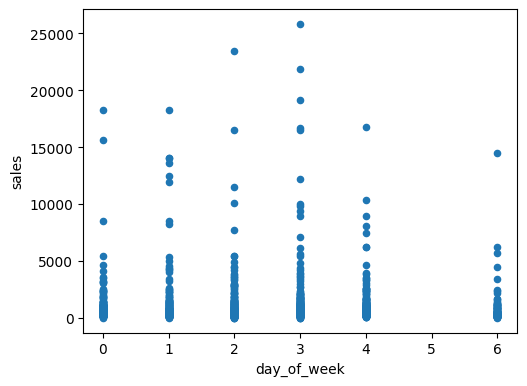

In [9]:
data.plot(x='day_of_week', y="sales", kind="scatter");

###  2.2 Line Chart

We generally use line charts **`to see the trend of one (or many variables) over time`**. For example, let's say we want to see the sales in Germany compared to France over time. **Pandas `plot` method** does a line chart by default.

The line chart is basically a scatterplot with the dots connected with one important difference - we specify just one variable to plot.

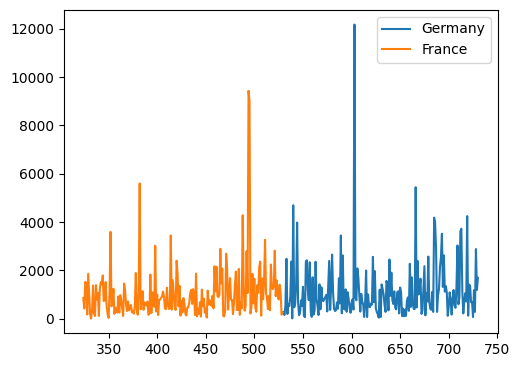

In [10]:
data[data.country=='Germany'].sales.plot(label="Germany")
data[data.country=='France'].sales.plot(label="France")
plt.legend();

This is not what we expected, but it helps you see how the line chart works - the points are plotted against the dataframe index. Because we did not specifically set the index, it is equal to the row numbers. 

To compare the sales over time like we want, we can set the index of the dataframe to the date.

In [11]:
data_indexed = data.set_index('date')
data_indexed.head()

,country,sales,n_items,n_orders,day_of_week
date,,,,,
2010-12-01,Australia,358.25,107,1,2
2010-12-08,Australia,258.90,214,1,2
2010-12-17,Australia,415.70,146,1,4
2011-01-06,Australia,7154.38,4802,2,3
2011-01-10,Australia,81.60,96,1,0


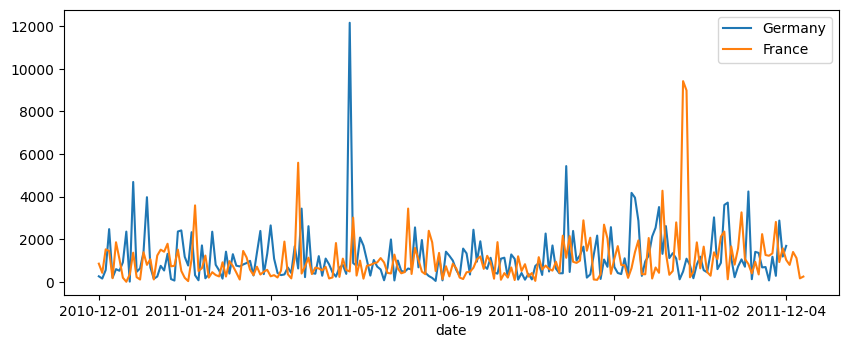

In [12]:
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany", figsize=(10,3.7))
data_indexed[data_indexed.country=='France'].sales.plot(label="France")
plt.legend();

Because the pandas plotting is done by matplotlib, we can call matplotlib methods to add features to pandas plots. For example, here we call directly the matplotlib `legend` to display the legend on top of a pandas plot. We have also increased the plot width using the `figsize` parameter.

We see that sales numbers in France and Germany are similar and that each country has a spike of sales on a certain day in 2011.

### 2.3 Using the matplotlib api

Sometimes, we want to display information in a way that **pandas `plot` method** doesn't allow us to. In those situations we can use te **matplotlib `plt.plot` method** directly. This gives us much more flexibility in formatting our charts. Check out the [reference](https://matplotlib.org/stable/api/pyplot_summary.html) to see all possible options.

Here we plot the volume of sales against the number of sold items for every country in the table. As expected, the relationship is pretty linear.

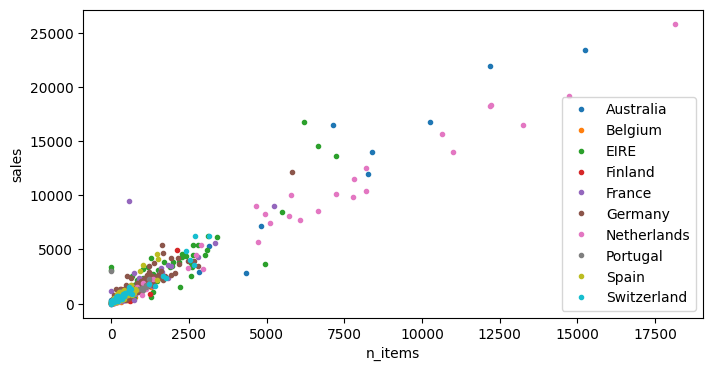

In [13]:
plt.figure(figsize=(8,4))
for country in data.country.unique():
    plt.plot(data[data.country == country].n_items,  # plot this series as the x
             data[data.country == country].sales,    # plot this series as the y
             marker='o',   # make the markers circle shaped
             linestyle='', # don't connect the dots with lines
             ms=3,         # size of the markers (in pixels)
             label=country # use the country as the label of this plot
            )
plt.ylabel('sales')
plt.xlabel('n_items')
plt.legend();

### 2.4 Bar/Column chart

We use bar/column charts **`to perform comparisons of discrete quantities`** for variables with just a few possible values (categorical variables). Normally you'd use the **horizontal bars** to compare across elements without a natural order (**nominal categorical variables**) and **column charts** (vertical bars) to compare **ordinal categorical variables**.

We're showing the code for both pyplot and pandas. For vertical bars, use `bar` instead of `barh`.

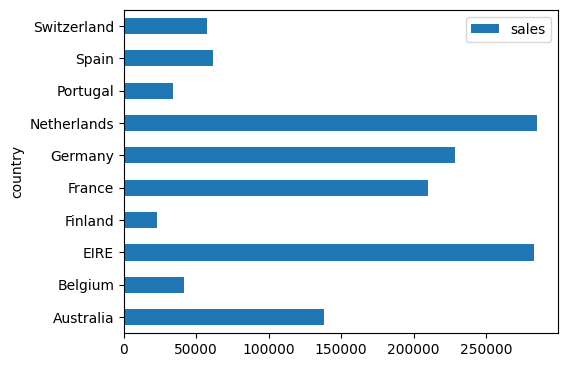

In [14]:
data.groupby('country', as_index=False)['sales'].sum().plot.barh(x="country", y="sales");

# same thing as:
#data.groupby('country')['sales'].sum().plot(kind="barh");

Here we can see that the top countries in terms of sales are Netherlands, Germany and EIRE. (What is EIRE? That's the Irish name for Ireland. Another indication that this dataset needs some cleaning. More about that in SLU06.)

#### 2.4.1 Stacked bar/column charts

We can plot a more informative bar plot by subdividing the bars according to another variable. For instance, we can plot the number of orders by country and day. There will be a bar for each country and each bar will be subdivided by day. To do that, we just include the **`stacked=True`** argument. Let's see:

<div class="alert alert-info">
    In order to give you this example, we need to make some data transformations using concepts and methods that we haven't told you about <strong>yet</strong>. So, just ignore it for now.

</div>

In [15]:
# Create a new column with weekday names
data['weekday'] = pd.to_datetime(data['date']).dt.day_name()

# Create a new DataFrame with the sum of n_orders by country and weekday
country_sales_by_weekday = data.pivot_table(values=['n_orders'], index='country', columns='weekday', aggfunc='sum')

# Convert weekday orders to percentage
country_sales_by_weekday = country_sales_by_weekday.div(country_sales_by_weekday.sum(1), axis=0)
country_sales_by_weekday

n_orders                                                  
weekday        Friday    Monday    Sunday  Thursday   Tuesday Wednesday
country                                                                
Australia    0.157895  0.122807  0.052632  0.280702  0.140351  0.245614
Belgium      0.234694  0.132653  0.061224  0.255102  0.163265  0.153061
EIRE         0.166667  0.215278  0.065972  0.211806  0.163194  0.177083
Finland      0.195122  0.073171  0.048780  0.317073  0.243902  0.121951
France       0.188776  0.150510  0.086735  0.196429  0.153061  0.224490
Germany      0.205689  0.161926  0.074398  0.260394  0.133479  0.164114
Netherlands  0.159574  0.095745  0.021277  0.255319  0.234043  0.234043
Portugal     0.137931  0.275862  0.051724  0.224138  0.103448  0.206897
Spain        0.144444  0.166667  0.111111  0.244444  0.144444  0.188889
Switzerland  0.296296  0.074074  0.074074  0.129630  0.129630  0.296296

Now we plot the orders by country and weekday. Notice that we also shift the legend outside of the plot bounding box (the bounding box is between (0,0) and (1,1) in axes coordinates). The coordinate tuple indicates the lower left corner of the legend box.

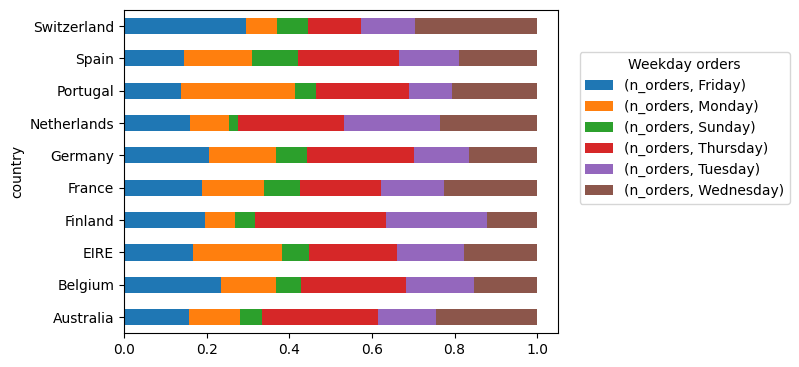

In [16]:
country_sales_by_weekday.plot.barh(stacked=True)
# same thing as:
#dpt.plot(kind='barh', stacked=True);
plt.legend(title="Weekday orders", loc=(1.05, 0.4));

The plot allows us to see that Switzerland and Belgium have more than 20% of their orders happening on Fridays.

### 2.5 Histograms

We can use histograms **`to make sure that nothing is fishy with the data`**, as well as to gain an understanding of its distribution. The histogram should shows us any outliers and the shape of the distribution. We may expect certain distribution for certain data types and not seeing it can alert us to a problem or make us reevaluate the way we want to analyze or model the data.

As an example, we can see how are sales distributed in Ireland.

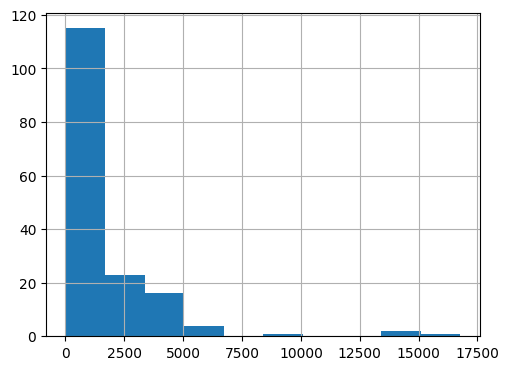

In [17]:
data[data.country=='EIRE'].sales.hist();

# same thing as:
#data[data.country=='EIRE'].sales.plot(kind="hist");

Here we see that, even though the majority of sales days in Ireland make less than 2500 GBP, some days have significantly higher sales. (Maybe Christmas?)

We can limit the extent of the x-axis of a histogram by using the parameter `xlim`.

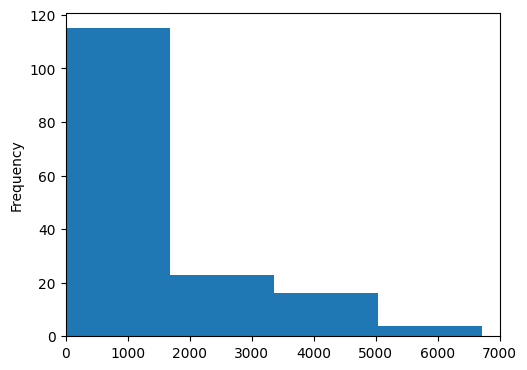

In [18]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000));

We can also specify the number of *bins* of the histogram by using the paramenter `bins`. Playing with the bin size is worth it - too large bins can mask the distribution shape and too small bins make the plot noisy.

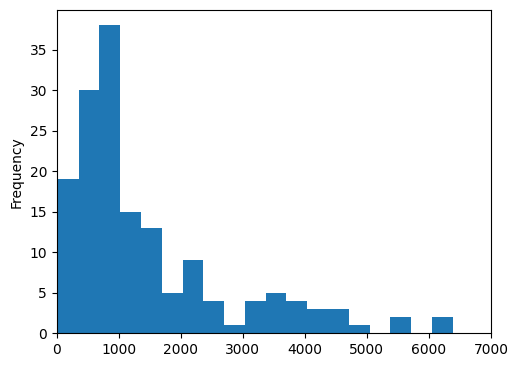

In [19]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=50);

So we see that the most common daily sales revenue in Ireland is around 1000 GBP per day.

### 2.6 Box Plot

The box plot (also called a **`whisker diagram`**) is a good option when you want **`to compare what is the variable distribution for different groups`**. For example, in the chart bellow, we are analyzing the weight of all different car models manufactured in 2004 and comparing between the regions of origin of those cars.

**`Outliers`** in the box plot (those points beyond the whiskers) are usually considered as being `1.5 * IQ` from the **1st Quartile** (low outliers) and `1.5 * IQ` from the **3rd Quartile** (high outliers).

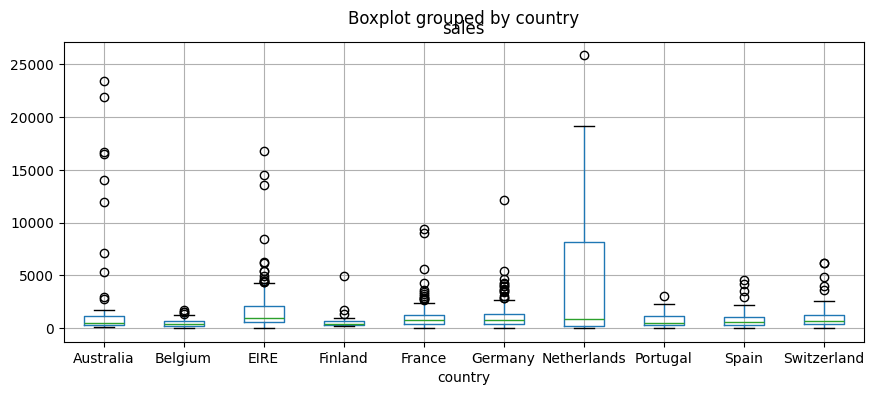

In [20]:
# kind="boxplot" doesn't work since it's not part of the pandas.plot api for legacy reasons
data.boxplot(column="sales", by="country", figsize=(10,4));

Here we see that the top countries in terms of sale volume (France, Germany and Ireland) have a significant number of outliers - sales days with out of the ordinary sale volumes. Netherlands, on the other hand, has sales that are more stable.

To show a boxplot horizontally, we can use the argument `vert=False`.

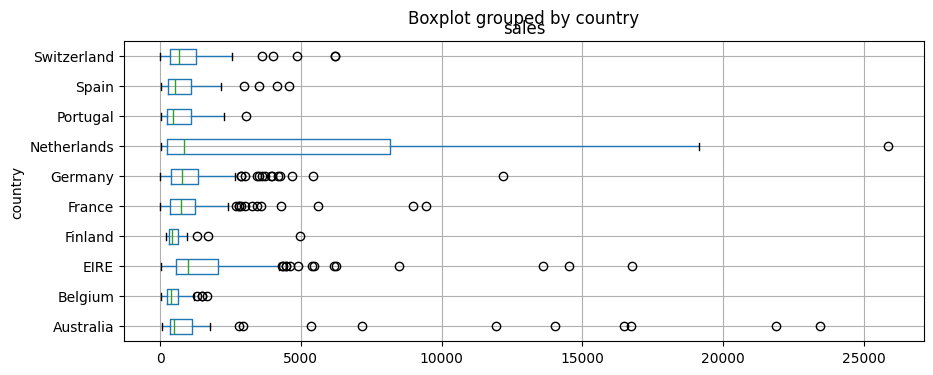

In [21]:
data.boxplot(column="sales", by="country", vert=False, figsize=(10,4));

## 3. Customizing plots

Using the **pandas `plot` method** as it is is good enough for doing data analysis (remember, data understanding is one of the main goals of data visualization). 

However, **when we want to share a chart with someone else** (whether that person is another data scientist or someone without a technical background), **we need to take more steps in order to provide the most effective visualizations**.

<img src="https://imgs.xkcd.com/comics/convincing.png" width="600"/>

**When producing charts for external use, always remember to:**

- Add a title describing the chart
- Add labels for all the axes
- Check the axes limits to make sure they are appropriate and help convey the right information
- Add legends if necessary (when dealing with multiple groups)
- Make sure the color palette you choose will display properly on the medium where it is going to be consumed (for example, which color is the background where the chart will be inserted, and how does it affect the chart visualized)
- Consider using a color palette appropriate for colorblind people (10% of the population)
- It is good practice, especially if the chart is to be displayed publicly (and thus probably isolated from its original document) to add a footnote to the chart specifying the source of the data.

### 3.1 Styles

Pandas uses matplotlib as a plotting backend. Thus, we can use matplotlib's styles and api to modify our charts/plots.

We can change the style, making use of all of matplotlib's styles available, checking through this line bellow:

In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

For example, we can change the style of the plots to the style `dark_background`.

In [23]:
plt.style.use('dark_background')

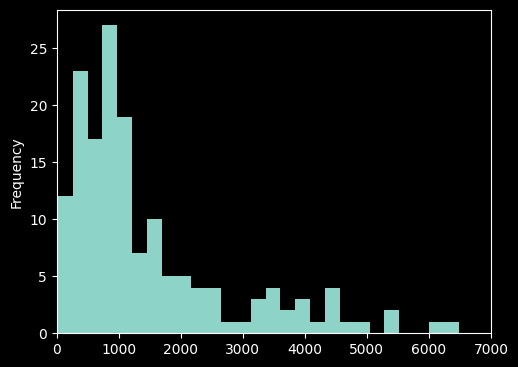

In [24]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70);

We can see that now the plot has a completely different set of fonts, color and sizes.

Of course we can _bypass_ the applied style by specifying parameters in the plot. 

Now, for example, if we want to plot the same histograme in a nice pink color we would do it like this:

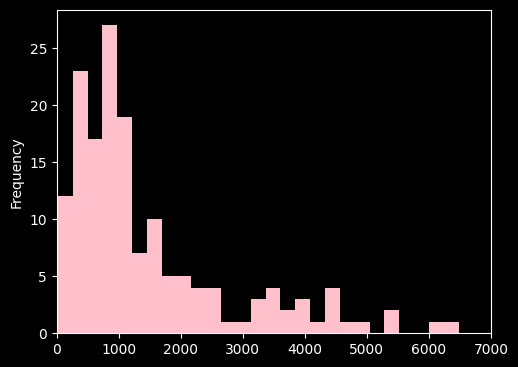

In [25]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70, color="pink");

### 3.2 Labels and titles

Finally, if we wanted to share our plot with someone else (to display in a publication or to share with a client) we can make use of matplotlib customization to make our plot more explicit and nicer looking.

For example, we can choose the style of another library *(ggplot, the most famous R plotting library)*.

In [26]:
plt.style.use('ggplot')

Here we customize the chart to make it ready to be shared. We apply the following modifications:

- We use `label` inside the `plot` function to assign a label to each plot. This will draw each line a different color, and will display the name on the legend.
- We activate the plot legend with `plt.legend`
- We add a title with `plt.title` (size 20)
- We set the range for the y-axis to (0, 13500)
- We add a legend for the x axis with `plt.xlabel` (size 15 points)
- We add a legend for the y axis with `plt.ylabel` (size 15 points)
- We add text on a specific position (Starting from the left and from the bottom, need to try multiple times to see what looks good)
- We change the color of the annotations to black.

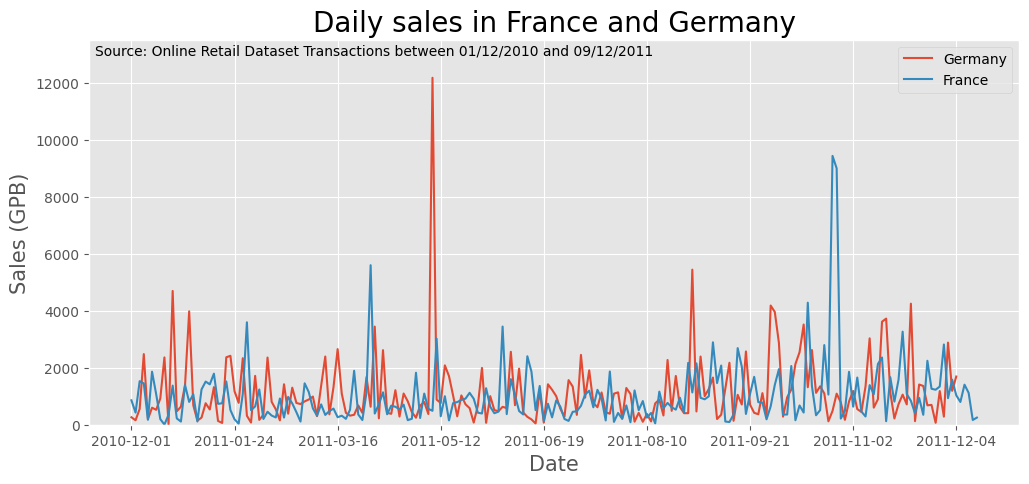

In [27]:
data_indexed = data.set_index('date')
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany", figsize=(12,5))
data_indexed[data_indexed.country=='France'].sales.plot(label="France")
plt.legend(labelcolor='black')
plt.ylim(0, 13500)
plt.title("Daily sales in France and Germany", size=20, color='black')
plt.xlabel("Date", size=15)
plt.ylabel("Sales (GPB)", size=15)
plt.figtext(0.13, 0.85, "Source: Online Retail Dataset Transactions between 01/12/2010 and 09/12/2011", color='black');

## 3. Further reading

Check out the [seaborn](https://seaborn.pydata.org/) library for more beautiful and complicated plots.

Now unleash your creative side in the exercise notebook!